# Setup

In [2]:
import os
import re
import json
import glob

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

from astropy.constants import R_earth
import tensorflow as tf

from geexhp import datagen, datamod, datavis
from geexhp import stages as st_
from geexhp import datavis as dvis
dvis.configure_matplotlib()

In [5]:
# Load the dictionary containing the normalization statistics
with open('../data/normalization_stats.json', 'r') as f:
    stats = json.load(f)

# Load the best model
model_load = tf.keras.models.load_model("NN_22-01-colab-habex.keras")

In [6]:
# Denormalization functions for physical and chemical outputs
def denormalize_physical(predictions, stats, targets):
    original = np.zeros_like(predictions)
    for i, target in enumerate(targets):
        # Get stats: min, max, and best_n
        min_val = stats['outputs'][target]['min']
        max_val = stats['outputs'][target]['max']
        best_n = stats['outputs'][target]['best_n']
        # Inverse transformation:
        # prediction = ((val - min) / (max - min))^(1/best_n)
        # Thus, val = min + (max - min) * (prediction)^(best_n)
        original[:, i] = min_val + (max_val - min_val) * (predictions[:, i] ** best_n)
    return original

def denormalize_chemical(predictions, stats, targets):
    original = np.zeros_like(predictions)
    for i, target in enumerate(targets):
        best_n = stats['outputs'][target]['best_n']
        # Inverse transformation: prediction = val^(1/best_n) so val = prediction^(best_n)
        original[:, i] = predictions[:, i] ** best_n
    return original

In [7]:
# Target lists
physical_targets = [
    "OBJECT-RADIUS-REL-EARTH",
    "OBJECT-GRAVITY",
    "ATMOSPHERE-TEMPERATURE",
    "ATMOSPHERE-PRESSURE"
]
main_chemical_targets = ['O2', 'O3']
other_chemical_targets = ['CH4', 'CO', 'CO2', 'H2O', 'N2', 'N2O']

In [8]:
# Just for fun :3
def format_title_luvoir(file_name):
    base = file_name.replace('.npy', '')
    parts = base.split('_')

    if parts[-1].lower() == "habex":
        parts.pop()

    if len(parts) >= 2:
        era = parts[0]
        distance = parts[1]
    else:
        match = re.match(r"(.+?)(\d+pc)$", parts[0], flags=re.IGNORECASE)
        if match:
            era, distance = match.groups()
        else:
            era = parts[0]
            distance = ""

    era = era.capitalize().replace("without", " without ")
    distance = re.sub(r"(\d+)(pc)", r"\1 pc", distance, flags=re.IGNORECASE)

    if distance:
        title = f"{era} at {distance} - HabEx/SS"
    else:
        title = f"{era} - HabEx/SS"
        
    return title

def get_stage_from_filename(file_name):
    lower = file_name.lower()
    if "modern" in lower:
        return "modern"
    elif "proterozoic" in lower:
        return "proterozoic"
    elif "archean" in lower:
        return "archean"
    else:
        return "modern"

# HABEX/SS

Processing file: proterozoic10pc_habex.npy


I0000 00:00:1741576025.514019  269811 service.cc:146] XLA service 0x7233e80331f0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741576025.514044  269811 service.cc:154]   StreamExecutor device (0): Host, Default Version
2025-03-10 00:07:05.527920: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step

Physical Outputs Comparison:


I0000 00:00:1741576025.786816  269811 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.173850,0.998887,0.174963
1,OBJECT-GRAVITY,12.732726,9.807000,2.925725
2,ATMOSPHERE-TEMPERATURE,280.039703,289.000000,-8.960297
3,ATMOSPHERE-PRESSURE,1715.241333,959.000000,756.241211



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,4.387210e-03,2.629730e-03,0.001757
1,O3,3.000000e-08,3.000000e-08,0.000000



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.005266,2.139460e-03,0.003127
1,CO,0.000029,1.741000e-05,0.000011
2,CO2,0.009402,1.252251e-02,-0.003121
3,H2O,0.003877,4.682740e-03,-0.000806
4,N2,0.981088,9.780081e-01,0.003080
5,N2O,0.000000,1.000000e-08,-0.000000


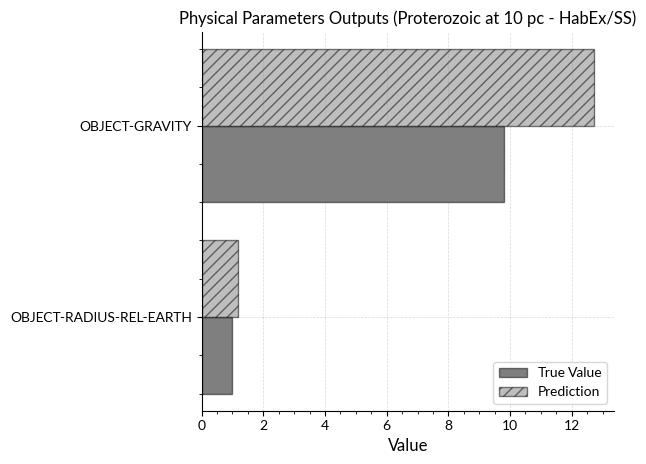

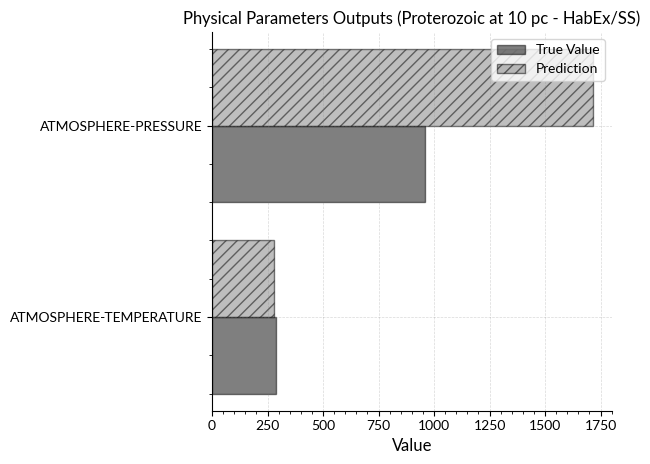

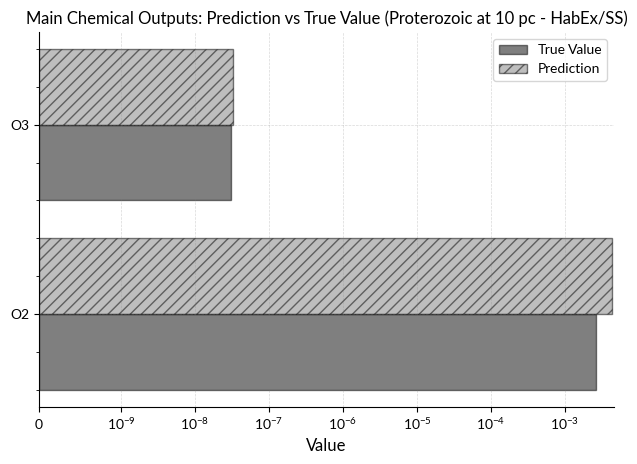

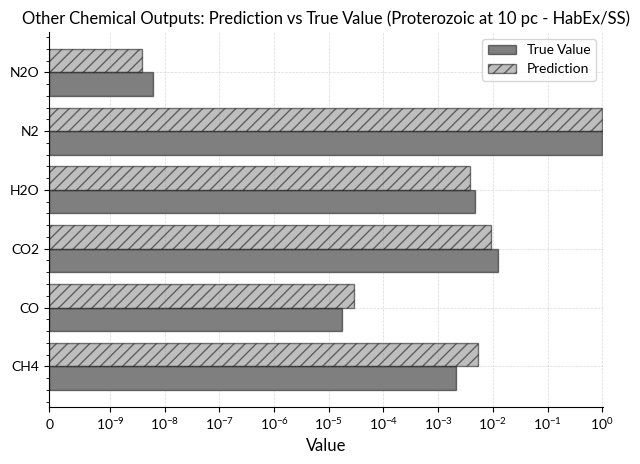



Processing file: archean5pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.215138,0.998887,0.216252
1,OBJECT-GRAVITY,13.590641,9.807000,3.783641
2,ATMOSPHERE-TEMPERATURE,280.012085,276.207386,3.804699
3,ATMOSPHERE-PRESSURE,1952.039673,1000.000000,952.039673



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002095,0.001927,0.000168
1,CO,0.000953,0.001609,-0.000656
2,CO2,0.013237,0.012595,0.000641
3,H2O,0.000115,0.000162,-0.000046
4,N2,0.982778,0.983706,-0.000928
5,N2O,0.000000,0.000000,0.000000


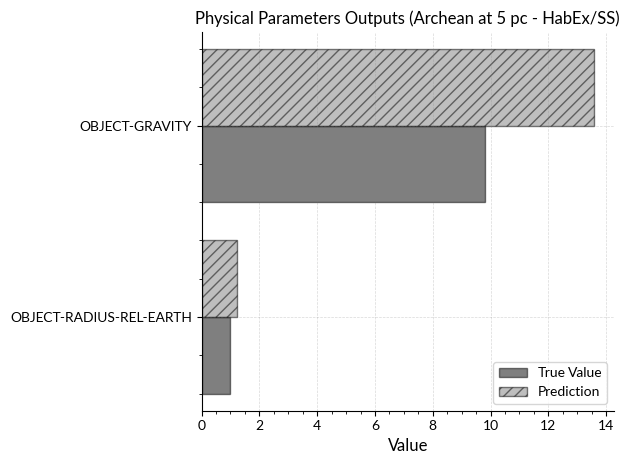

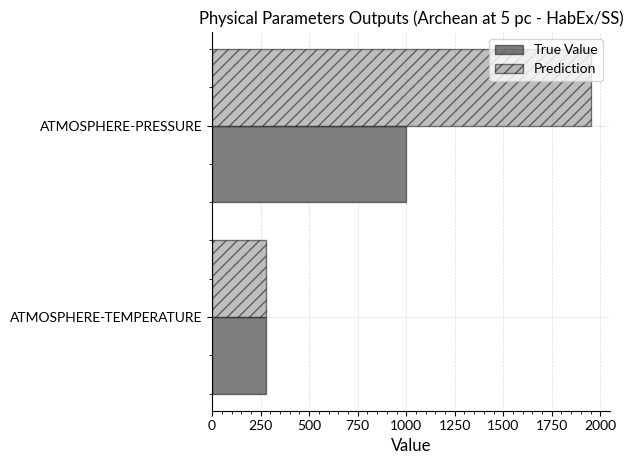

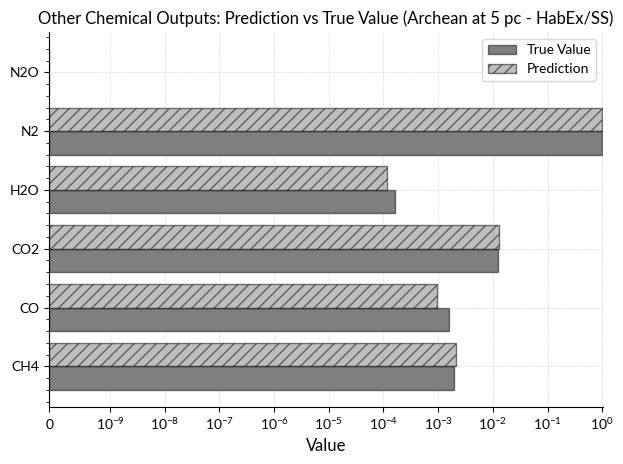



Processing file: proterozoic5pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.195965,0.998887,0.197078
1,OBJECT-GRAVITY,13.190121,9.807000,3.383121
2,ATMOSPHERE-TEMPERATURE,287.134338,289.000000,-1.865662
3,ATMOSPHERE-PRESSURE,1839.861328,959.000000,880.861206



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,1.970890e-03,2.629730e-03,-0.000659
1,O3,3.000000e-08,3.000000e-08,0.000000



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.003153,2.139460e-03,0.001014
1,CO,0.000023,1.741000e-05,0.000005
2,CO2,0.011598,1.252251e-02,-0.000924
3,H2O,0.003298,4.682740e-03,-0.001385
4,N2,0.983623,9.780081e-01,0.005615
5,N2O,0.000000,1.000000e-08,-0.000000


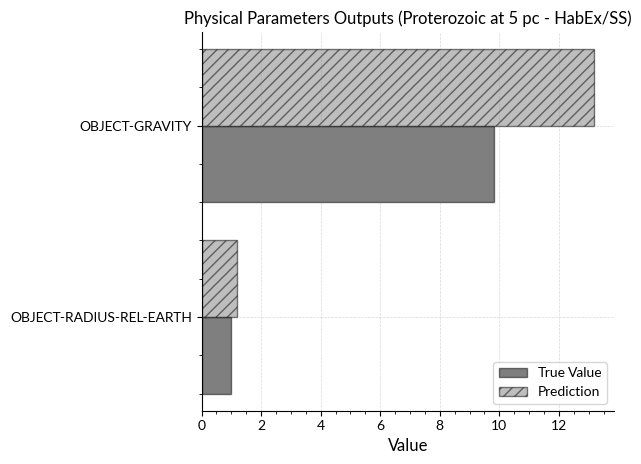

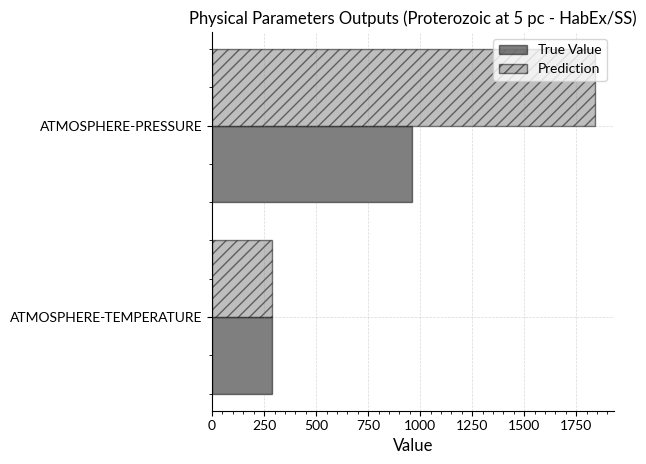

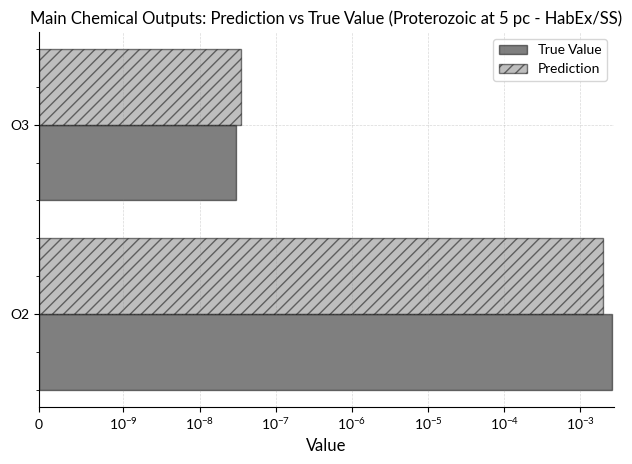

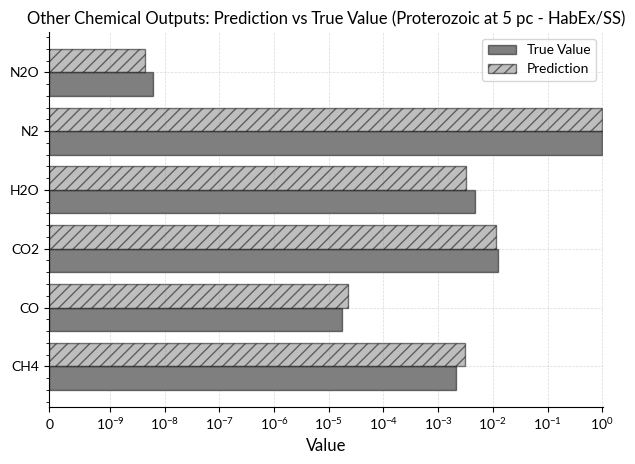



Processing file: modernwithoutO2_10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.059355,0.998887,0.060468
1,OBJECT-GRAVITY,10.689440,9.807000,0.882440
2,ATMOSPHERE-TEMPERATURE,287.057678,288.200000,-1.142322
3,ATMOSPHERE-PRESSURE,1206.696045,1013.000000,193.696045



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.003845,0.000000,0.003845
1,O3,0.000004,0.000002,0.000003



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,9.800000e-07,1.720000e-06,-7.300000e-07
1,CO,1.500000e-06,3.210000e-06,-1.710000e-06
2,CO2,3.939400e-04,3.830100e-04,1.093000e-05
3,H2O,7.888800e-04,4.620700e-04,3.268200e-04
4,N2,9.982381e-01,7.882168e-01,2.100214e-01
5,N2O,1.400000e-07,3.200000e-07,-1.900000e-07


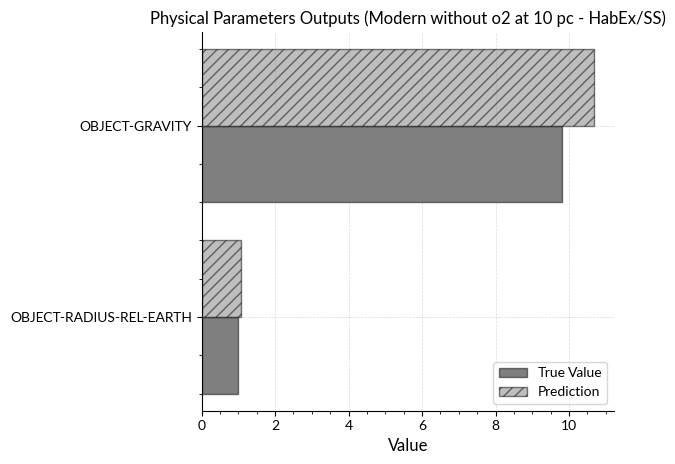

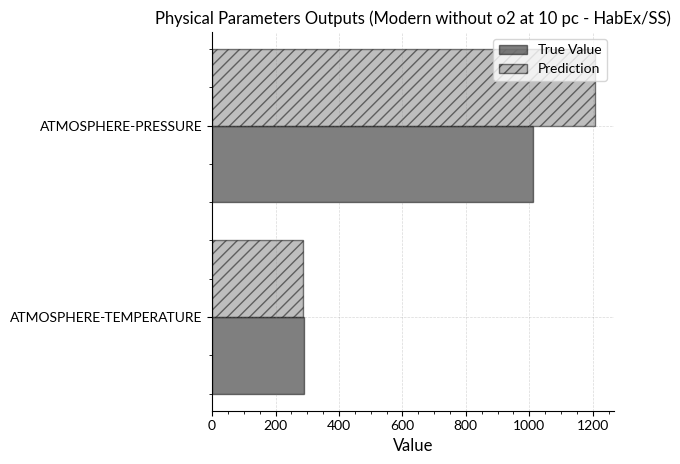

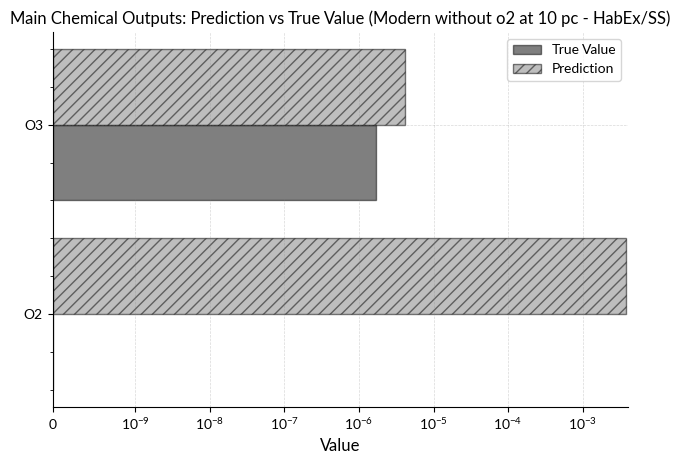

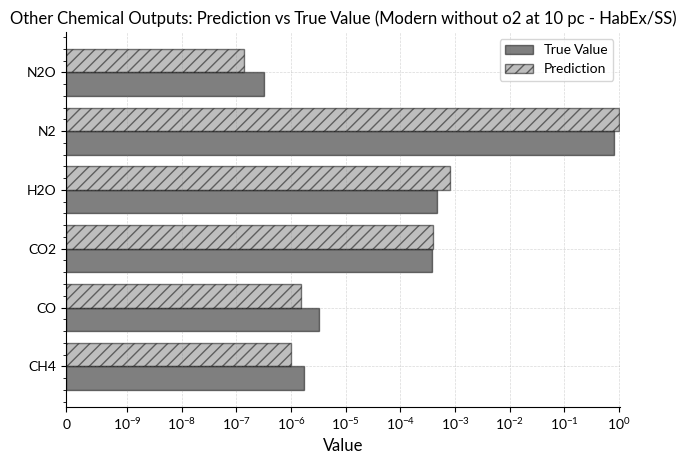



Processing file: modernwithout03_10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.207177,0.998887,0.208290
1,OBJECT-GRAVITY,13.417078,9.807000,3.610078
2,ATMOSPHERE-TEMPERATURE,277.335754,288.200000,-10.864246
3,ATMOSPHERE-PRESSURE,1903.969727,1013.000000,890.969727



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.078630,0.210931,-1.323013e-01
1,O3,0.000002,0.000002,2.500000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.600000e-06,1.720000e-06,8.900000e-07
1,CO,1.690000e-06,3.210000e-06,-1.520000e-06
2,CO2,7.570000e-05,3.830100e-04,-3.073000e-04
3,H2O,2.013900e-04,4.620700e-04,-2.606700e-04
4,N2,9.177110e-01,7.882168e-01,1.294942e-01
5,N2O,1.900000e-07,3.200000e-07,-1.300000e-07


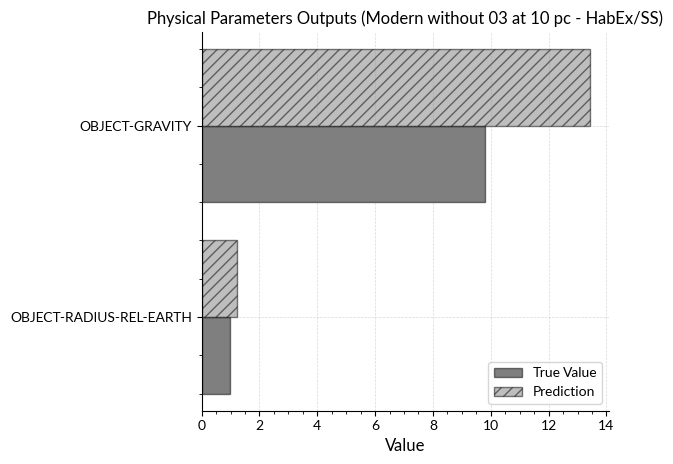

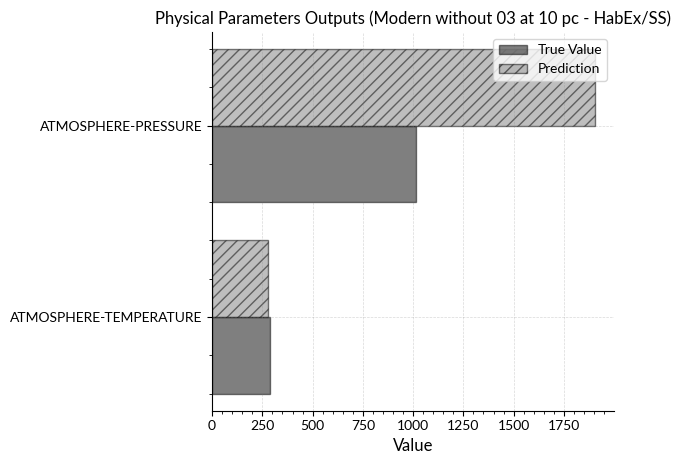

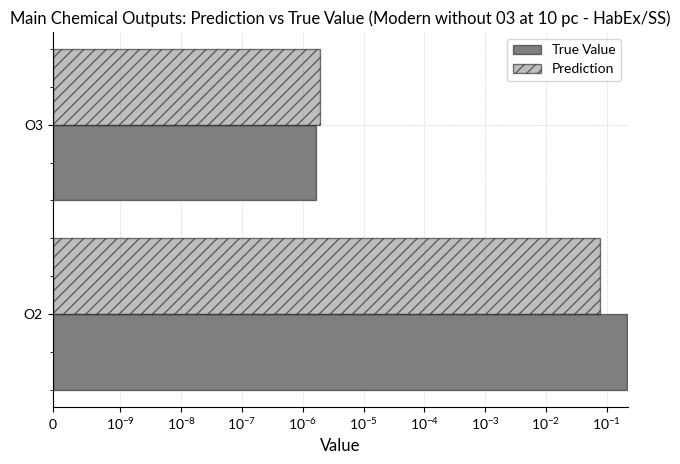

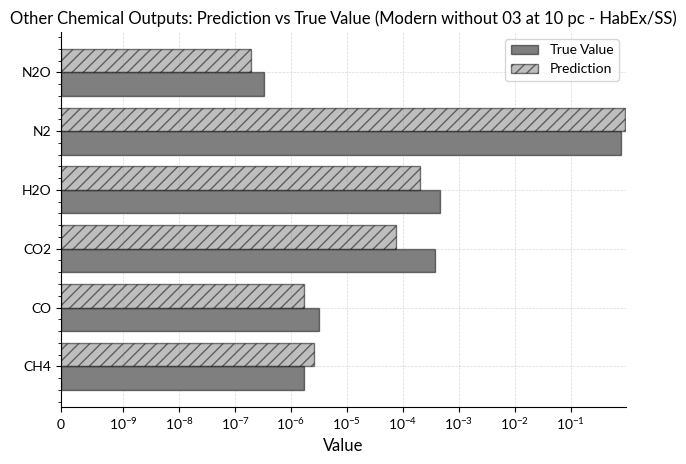



Processing file: archean15pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.165441,0.998887,0.166554
1,OBJECT-GRAVITY,12.568426,9.807000,2.761426
2,ATMOSPHERE-TEMPERATURE,280.965546,276.207386,4.758159
3,ATMOSPHERE-PRESSURE,1669.492432,1000.000000,669.492432



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.009649,0.001927,0.007722
1,CO,0.002153,0.001609,0.000544
2,CO2,0.025457,0.012595,0.012862
3,H2O,0.000114,0.000162,-0.000048
4,N2,0.955357,0.983706,-0.028349
5,N2O,0.000000,0.000000,0.000000


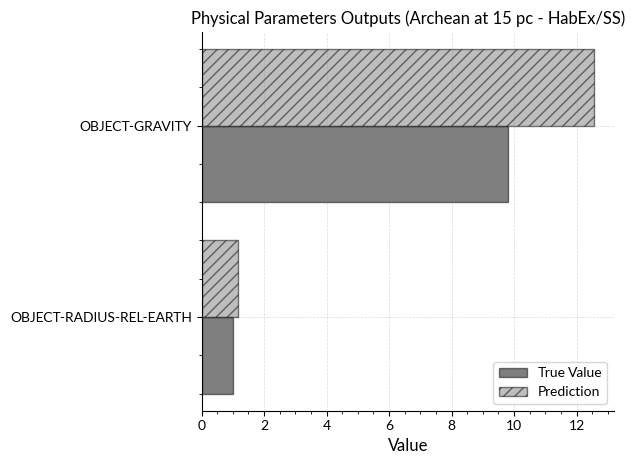

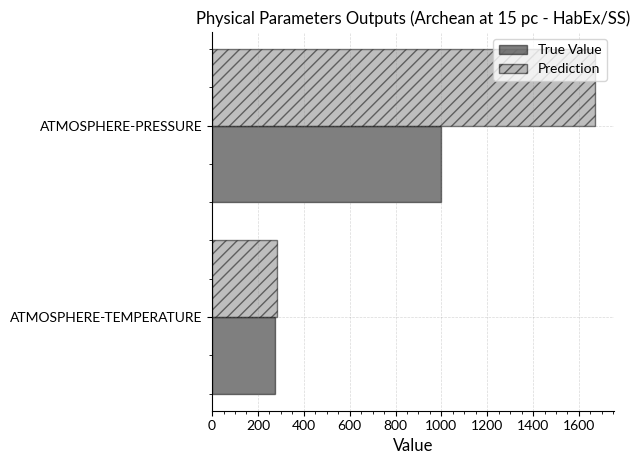

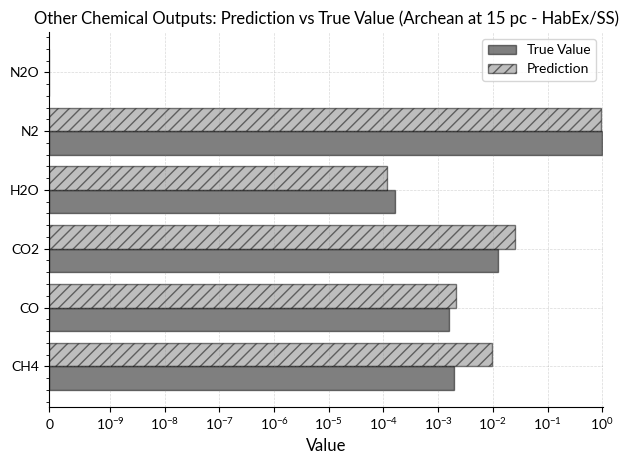



Processing file: modern5pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.187816,0.998887,0.188929
1,OBJECT-GRAVITY,13.016215,9.807000,3.209215
2,ATMOSPHERE-TEMPERATURE,281.479919,288.200000,-6.720081
3,ATMOSPHERE-PRESSURE,1792.040649,1013.000000,779.040649



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.125587,0.210931,-8.534383e-02
1,O3,0.000002,0.000002,2.800000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.560000e-06,1.720000e-06,8.400000e-07
1,CO,2.030000e-06,3.210000e-06,-1.180000e-06
2,CO2,1.125800e-04,3.830100e-04,-2.704300e-04
3,H2O,3.631400e-04,4.620700e-04,-9.893000e-05
4,N2,8.717794e-01,7.882168e-01,8.356263e-02
5,N2O,2.400000e-07,3.200000e-07,-8.000000e-08


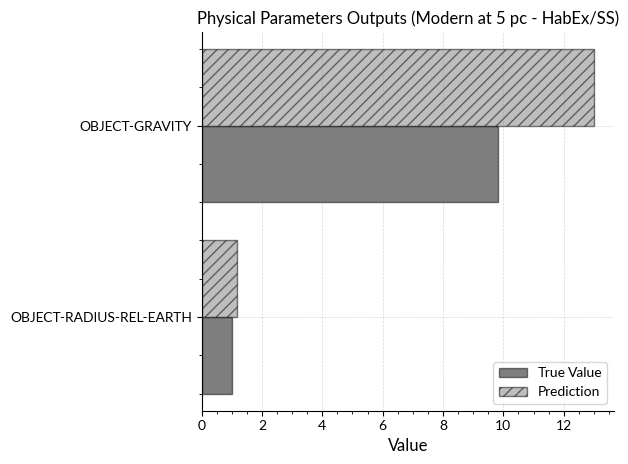

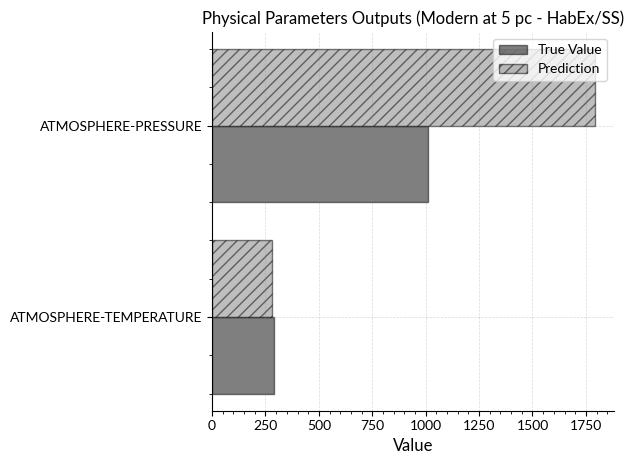

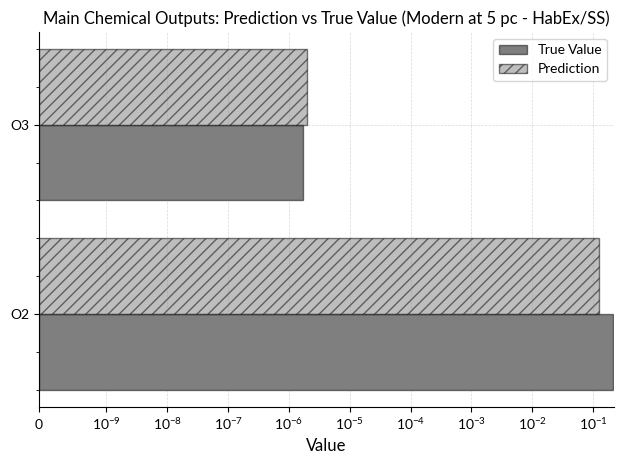

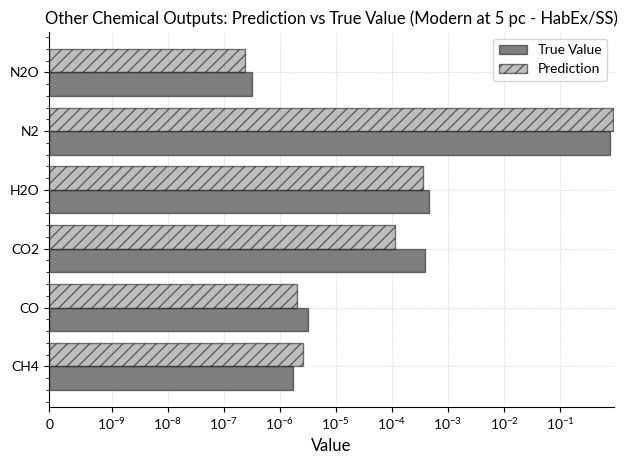



Processing file: archean10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.215686,0.998887,0.216800
1,OBJECT-GRAVITY,13.604119,9.807000,3.797119
2,ATMOSPHERE-TEMPERATURE,279.840790,276.207386,3.633403
3,ATMOSPHERE-PRESSURE,1955.757202,1000.000000,955.757324



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002091,0.001927,0.000164
1,CO,0.000347,0.001609,-0.001262
2,CO2,0.015187,0.012595,0.002592
3,H2O,0.000092,0.000162,-0.000069
4,N2,0.983223,0.983706,-0.000483
5,N2O,0.000000,0.000000,0.000000


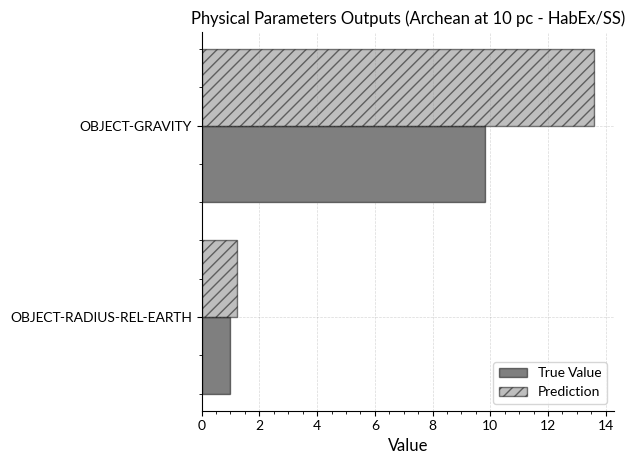

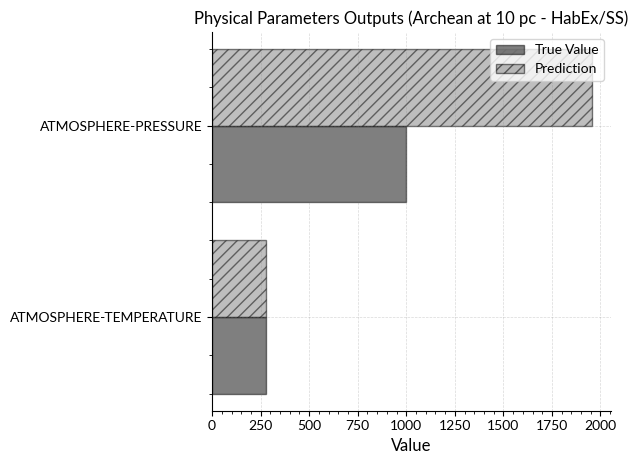

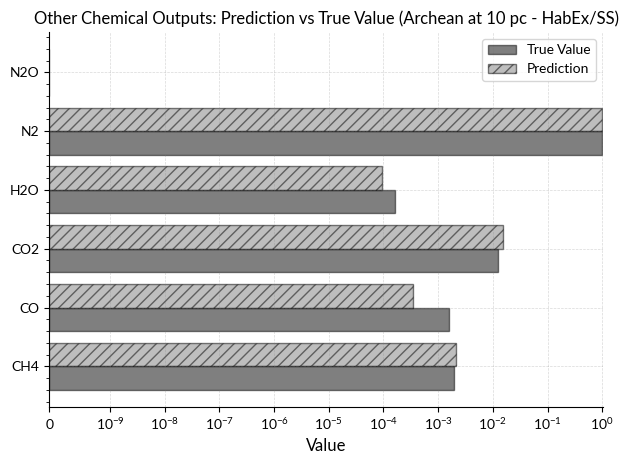



Processing file: modernwithoutO210pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.055131,0.998887,0.056244
1,OBJECT-GRAVITY,10.623152,9.807000,0.816152
2,ATMOSPHERE-TEMPERATURE,282.312897,288.200000,-5.887103
3,ATMOSPHERE-PRESSURE,1192.797729,1013.000000,179.797729



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.007029,0.000000,0.007029
1,O3,0.000004,0.000002,0.000002



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,8.700000e-07,1.720000e-06,-8.500000e-07
1,CO,1.730000e-06,3.210000e-06,-1.480000e-06
2,CO2,7.939400e-04,3.830100e-04,4.109300e-04
3,H2O,7.551300e-04,4.620700e-04,2.930600e-04
4,N2,9.861759e-01,7.882168e-01,1.979592e-01
5,N2O,1.800000e-07,3.200000e-07,-1.400000e-07


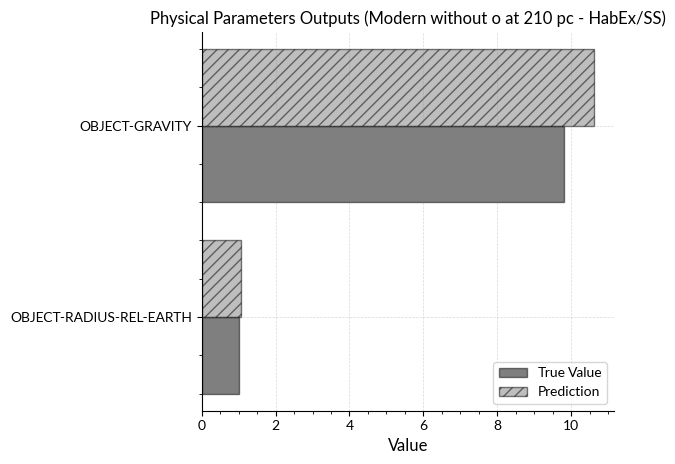

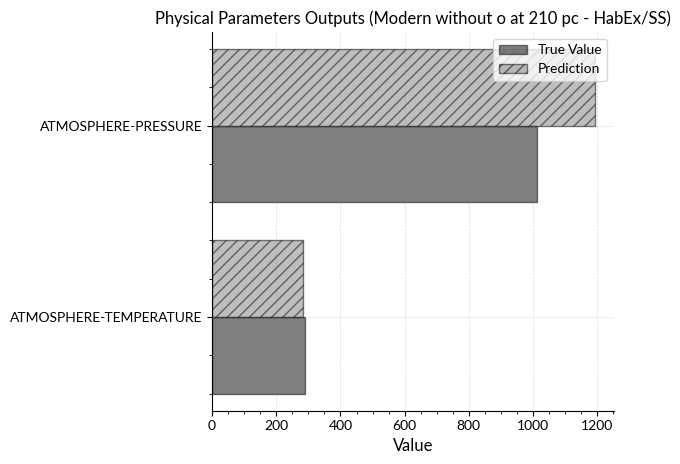

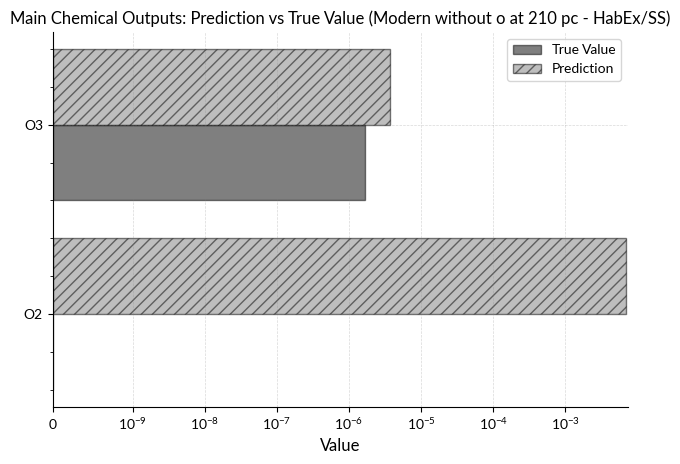

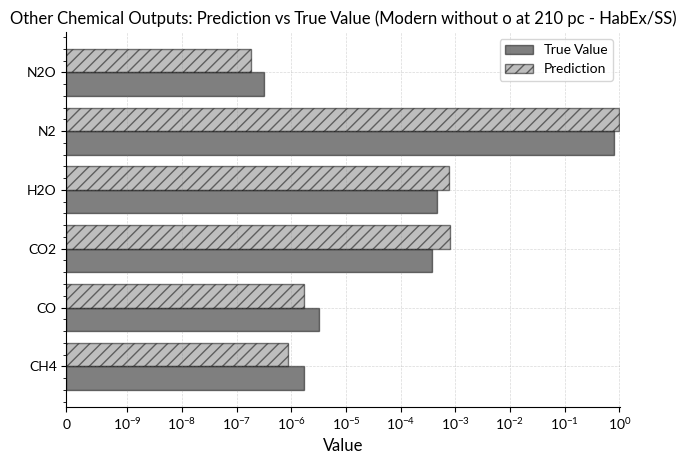



Processing file: modernwithout02_10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.168042,0.998887,0.169156
1,OBJECT-GRAVITY,12.613715,9.807000,2.806715
2,ATMOSPHERE-TEMPERATURE,277.619415,288.200000,-10.580585
3,ATMOSPHERE-PRESSURE,1683.469971,1013.000000,670.469849



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.121217,0.210931,-8.971404e-02
1,O3,0.000002,0.000002,5.600000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,1.430000e-06,1.720000e-06,-2.800000e-07
1,CO,1.590000e-06,3.210000e-06,-1.620000e-06
2,CO2,2.784000e-05,3.830100e-04,-3.551700e-04
3,H2O,3.463300e-04,4.620700e-04,-1.157400e-04
4,N2,8.722580e-01,7.882168e-01,8.404125e-02
5,N2O,1.800000e-07,3.200000e-07,-1.400000e-07


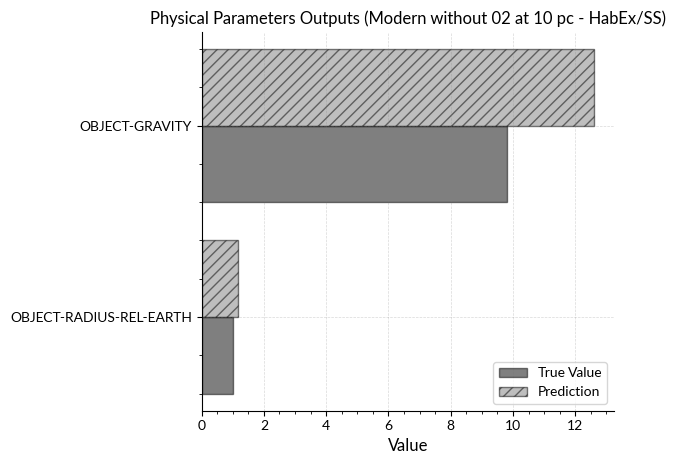

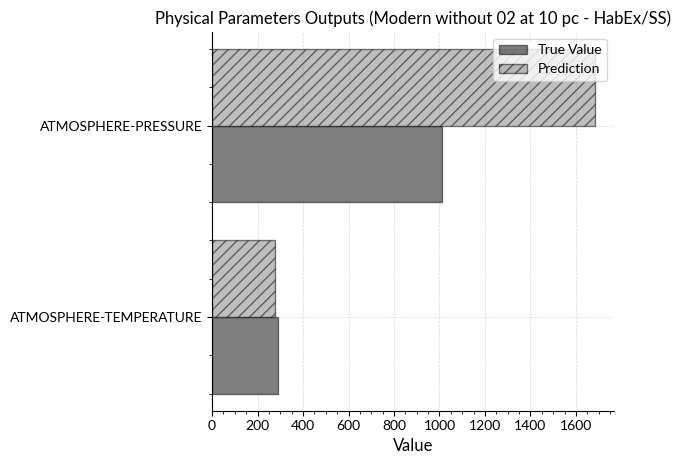

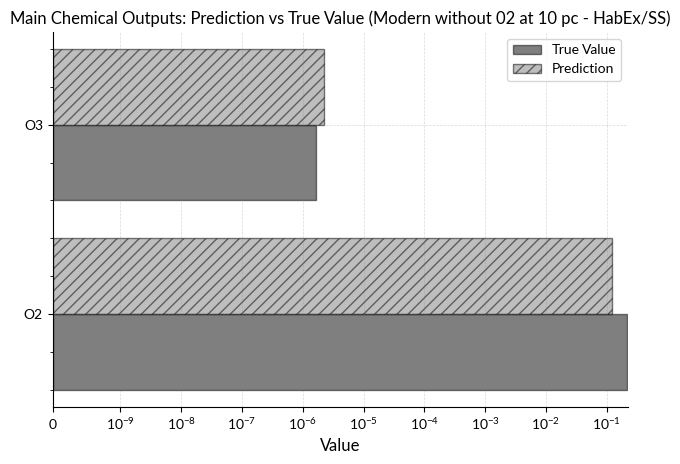

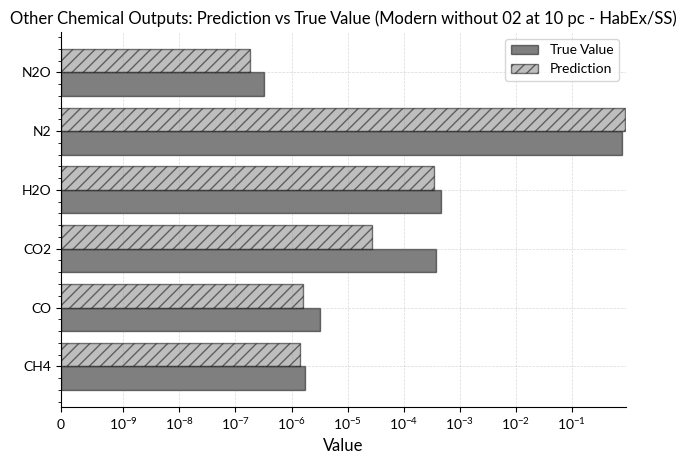



Processing file: modern15pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.150881,0.998887,0.151994
1,OBJECT-GRAVITY,12.298648,9.807000,2.491649
2,ATMOSPHERE-TEMPERATURE,283.728546,288.200000,-4.471454
3,ATMOSPHERE-PRESSURE,1596.731201,1013.000000,583.731201



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.363788,0.210931,1.528568e-01
1,O3,0.000003,0.000002,9.700000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,1.940000e-06,1.720000e-06,2.200000e-07
1,CO,2.540000e-06,3.210000e-06,-6.700000e-07
2,CO2,2.178100e-04,3.830100e-04,-1.651900e-04
3,H2O,4.822800e-04,4.620700e-04,2.021000e-05
4,N2,6.547517e-01,7.882168e-01,-1.334651e-01
5,N2O,3.000000e-07,3.200000e-07,-2.000000e-08


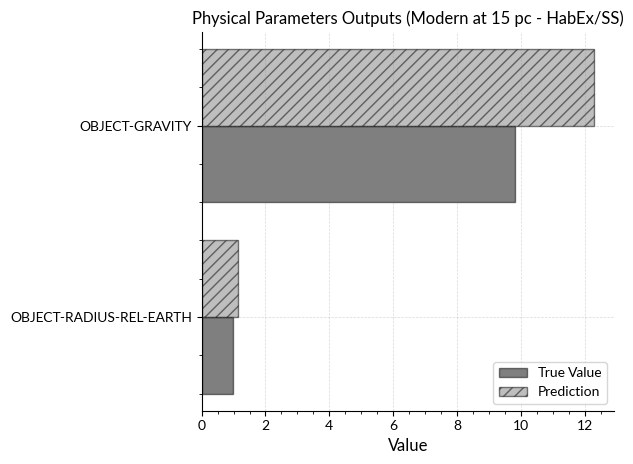

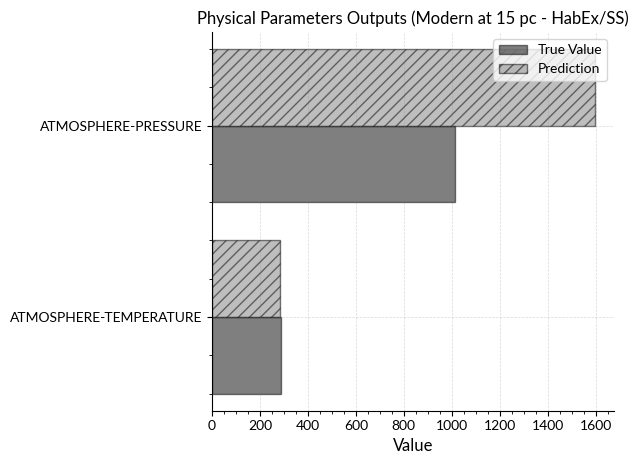

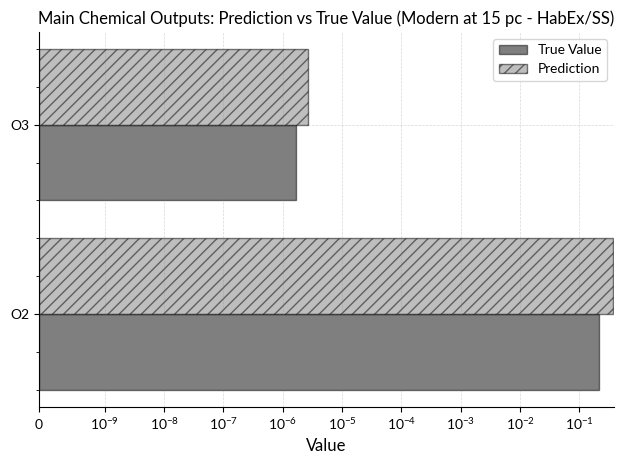

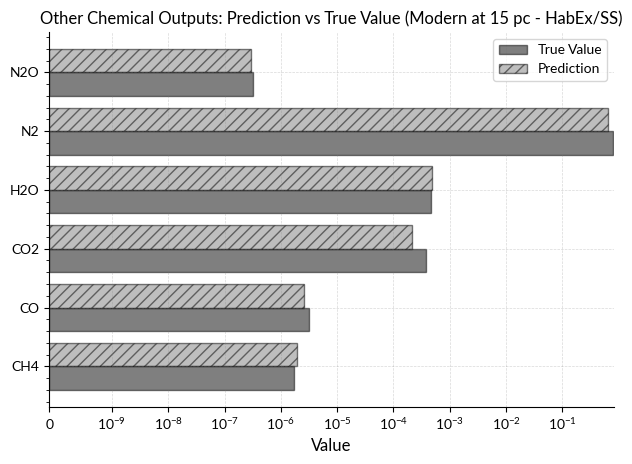



Processing file: modernwithoutO3_10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.132166,0.998887,0.133279
1,OBJECT-GRAVITY,11.956823,9.807000,2.149823
2,ATMOSPHERE-TEMPERATURE,296.315308,288.200000,8.115308
3,ATMOSPHERE-PRESSURE,1507.377686,1013.000000,494.377686



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.138634,0.210931,-0.072297
1,O3,0.000000,0.000000,0.000000



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,9.450000e-06,1.720000e-06,7.730000e-06
1,CO,3.660000e-06,3.210000e-06,4.500000e-07
2,CO2,4.102600e-04,3.830100e-04,2.726000e-05
3,H2O,3.846400e-04,4.620700e-04,-7.742000e-05
4,N2,8.935623e-01,7.882168e-01,1.053456e-01
5,N2O,2.000000e-08,3.200000e-07,-3.000000e-07


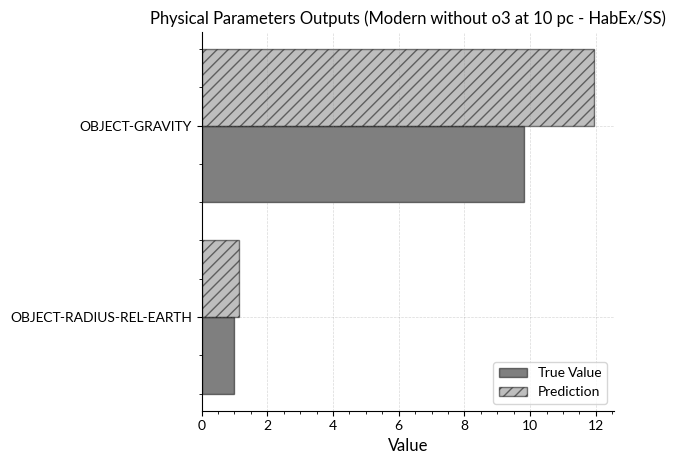

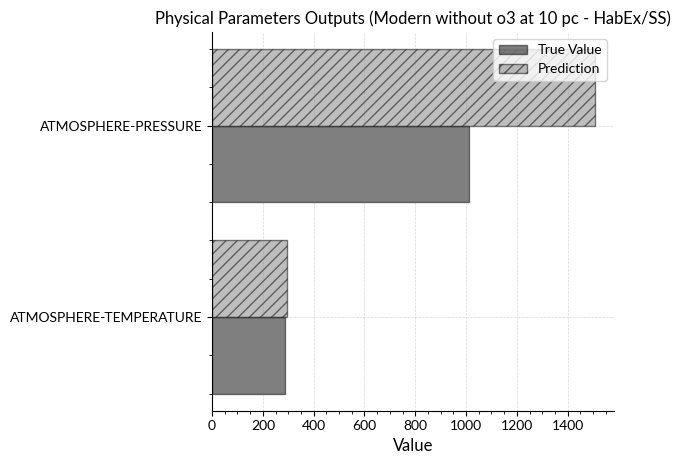

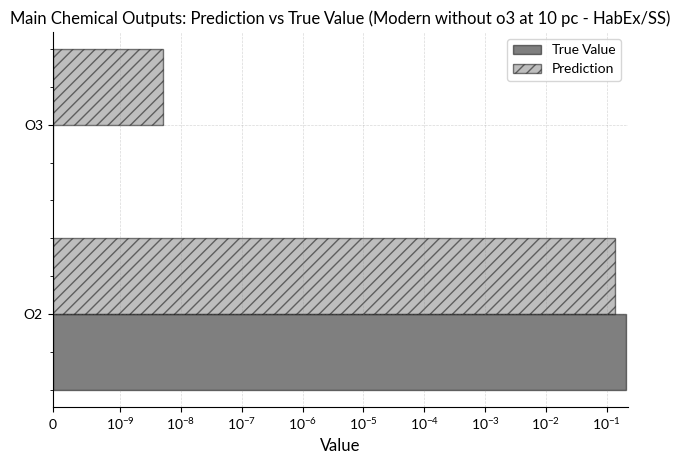

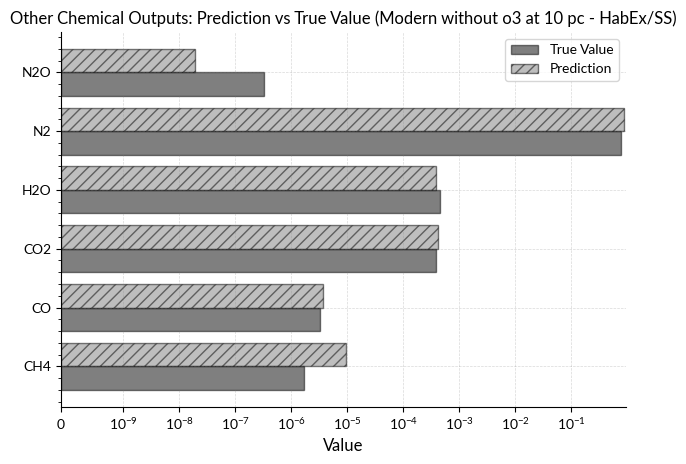



Processing file: modern10pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.177763,0.998887,0.178876
1,OBJECT-GRAVITY,12.807777,9.807000,3.000777
2,ATMOSPHERE-TEMPERATURE,280.822052,288.200000,-7.377948
3,ATMOSPHERE-PRESSURE,1735.348267,1013.000000,722.348267



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.098894,0.210931,-1.120374e-01
1,O3,0.000002,0.000002,6.900000e-07



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,1.620000e-06,1.720000e-06,-9.000000e-08
1,CO,2.060000e-06,3.210000e-06,-1.150000e-06
2,CO2,1.082300e-04,3.830100e-04,-2.747800e-04
3,H2O,4.375500e-04,4.620700e-04,-2.451000e-05
4,N2,8.957598e-01,7.882168e-01,1.075431e-01
5,N2O,2.000000e-07,3.200000e-07,-1.300000e-07


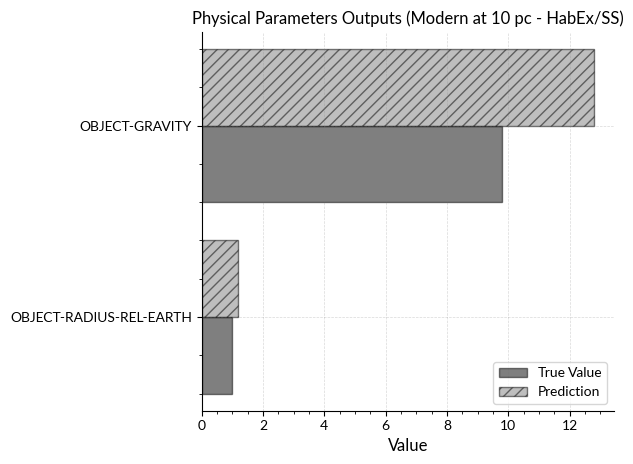

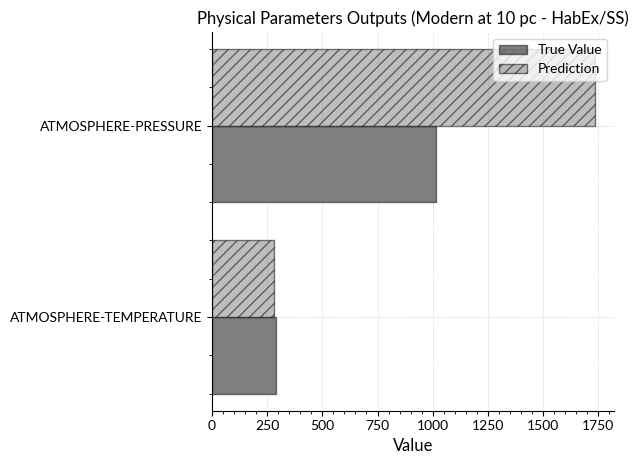

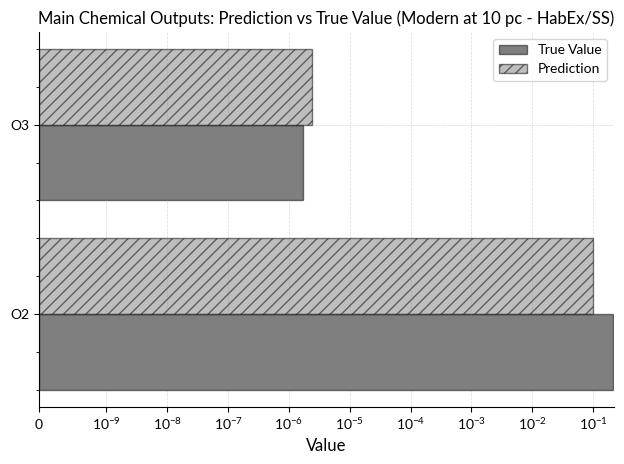

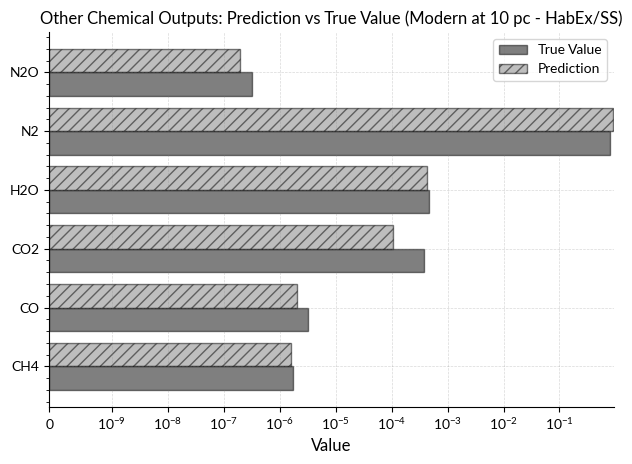



Processing file: proterozoic15pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.108881,0.998887,0.109994
1,OBJECT-GRAVITY,11.552954,9.807000,1.745954
2,ATMOSPHERE-TEMPERATURE,296.845001,289.000000,7.845001
3,ATMOSPHERE-PRESSURE,1406.896484,959.000000,447.896484



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,1.394920e-03,2.629730e-03,-1.234810e-03
1,O3,4.000000e-08,3.000000e-08,1.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002909,2.139460e-03,0.000770
1,CO,0.000022,1.741000e-05,0.000004
2,CO2,0.013154,1.252251e-02,0.000632
3,H2O,0.005955,4.682740e-03,0.001272
4,N2,0.971346,9.780081e-01,-0.006662
5,N2O,0.000000,1.000000e-08,-0.000000


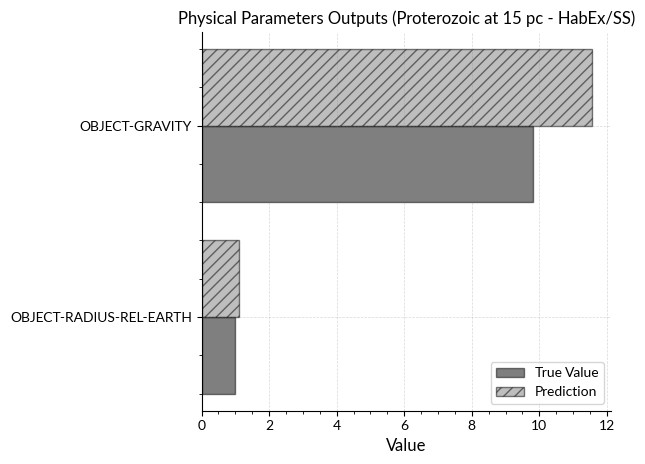

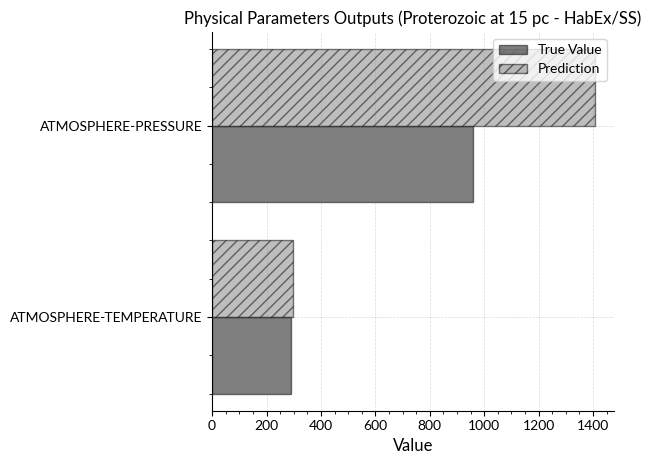

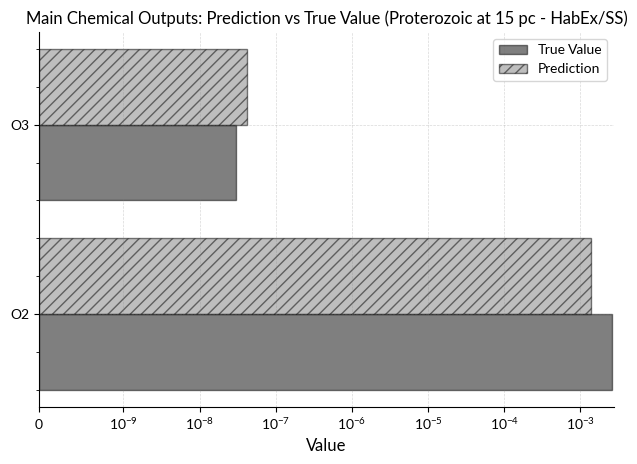

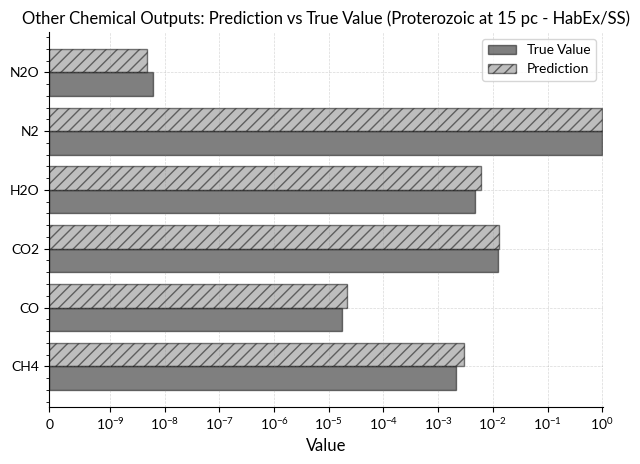



Processing file: modernwithoutO310pc_habex.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,0.959976,0.000,0.959976
1,OBJECT-GRAVITY,9.138920,9.807,-0.668080
2,ATMOSPHERE-TEMPERATURE,297.898773,210.000,87.898773
3,ATMOSPHERE-PRESSURE,880.848877,1013.000,-132.151123



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.021063,0.0,0.021063
1,O3,0.000002,0.0,0.000002



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.290000e-06,1.700000e-06,2.590000e-06
1,CO,5.210000e-06,0.000000e+00,5.210000e-06
2,CO2,3.778320e-03,3.795000e-04,3.398820e-03
3,H2O,4.754310e-03,0.000000e+00,4.754310e-03
4,N2,9.314537e-01,7.810000e-01,1.504536e-01
5,N2O,2.300000e-07,3.200000e-07,-9.000000e-08


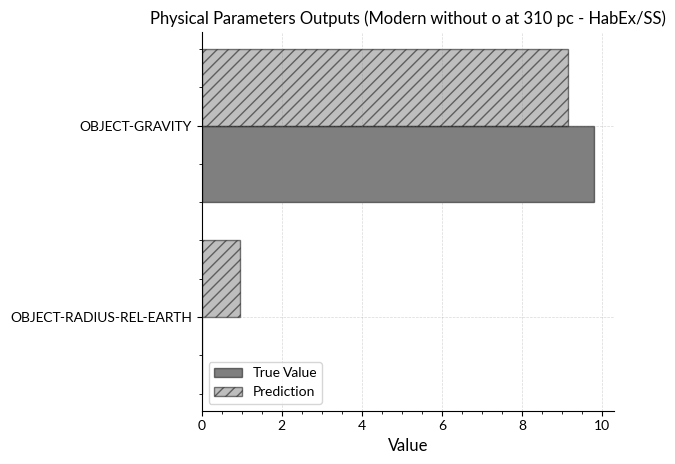

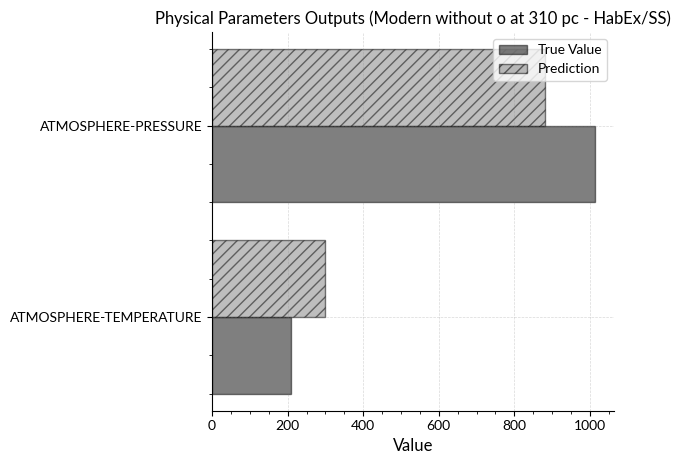

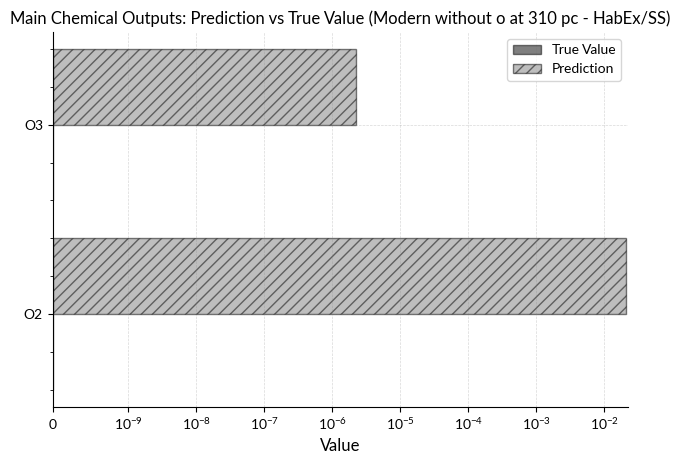

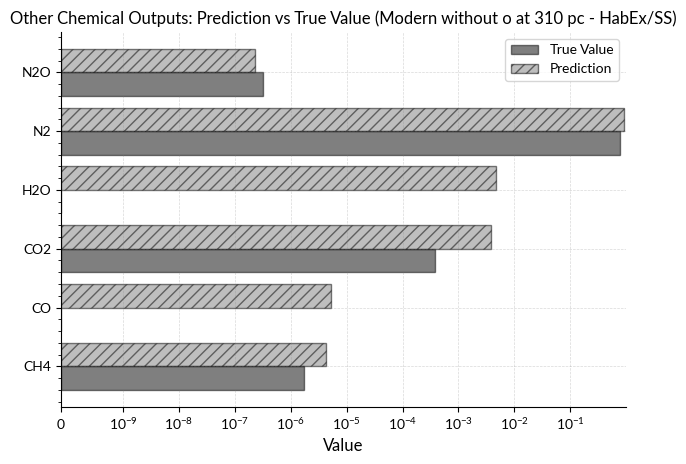

In [9]:
npy_files = glob.glob("../data/tests/*habex*.npy")

for file_path in npy_files:
    ############ DATA PROCESSING ############
    file_name = os.path.basename(file_path)
    formatted_title = format_title_luvoir(file_name)
    print(f"Processing file: {file_name}")
    
    data = np.load(file_path, allow_pickle=True)
    
    uv = data[0]["NOISY_ALBEDO"]
    vis = data[1]["NOISY_ALBEDO"]
    nir = data[2]["NOISY_ALBEDO"]
    
    uv_mean, uv_std = stats['inputs']['SS-UV']['mean'], stats['inputs']['SS-UV']['std']
    vis_mean, vis_std = stats['inputs']['SS-Vis']['mean'], stats['inputs']['SS-Vis']['std']
    nir_mean, nir_std = stats['inputs']['SS-NIR']['mean'], stats['inputs']['SS-NIR']['std']

    ############ DENORMALIZATION ############
    uv_normalized = (uv - uv_mean) / uv_std
    vis_normalized = (vis - vis_mean) / vis_std
    nir_normalized = (nir - nir_mean) / nir_std

    uv_normalized = uv_normalized.reshape(1, 7, 1)
    vis_normalized = vis_normalized.reshape(1, 109, 1)
    nir_normalized = nir_normalized.reshape(1, 25, 1)
    
    predictions = model_load.predict([uv_normalized, vis_normalized, nir_normalized])
    
    physical_pred = denormalize_physical(predictions['physical_output'], stats, physical_targets)
    main_chem_pred = denormalize_chemical(predictions['main_chemical_output'], stats, main_chemical_targets)
    other_chem_pred = denormalize_chemical(predictions['other_chemical_output'], stats, other_chemical_targets)
    
    ############ COMPARISON TABLES ############
    def get_gt(target):
        val = data[0].get(target, None)
        if val is None:
            return 0.0
        try:
            return float(val)
        except (ValueError, TypeError):
            return 0.0

    def build_comparison_df(targets, pred_values):
        data_list = []
        for i, target in enumerate(targets):
            pred_val = pred_values[0][i]
            gt_val = get_gt(target)
            diff = pred_val - gt_val
            data_list.append({
                "Target": target,
                "Prediction": pred_val,
                "True Value": gt_val,
                "Difference": diff
            })
        return pd.DataFrame(data_list)

    physical_df = build_comparison_df(physical_targets, physical_pred)
    main_chem_df = build_comparison_df(main_chemical_targets, main_chem_pred)
    other_chem_df = build_comparison_df(other_chemical_targets, other_chem_pred)
    
    print("\nPhysical Outputs Comparison:")
    display(physical_df.round(8))
    
    if 'archean' not in file_name.lower():
        print("\nMain Chemical Outputs Comparison:")
        display(main_chem_df.round(8))
    
    print("\nOther Chemical Outputs Comparison:")
    display(other_chem_df.round(8))

    ############ PLOTTING ############
    low_physical_targets = ["OBJECT-RADIUS-REL-EARTH", "OBJECT-GRAVITY"]
    high_physical_targets = ["ATMOSPHERE-TEMPERATURE", "ATMOSPHERE-PRESSURE"]
    
    low_physical_df = physical_df[physical_df["Target"].isin(low_physical_targets)]
    high_physical_df = physical_df[physical_df["Target"].isin(high_physical_targets)]
    
    if not low_physical_df.empty:
        y_low = range(len(low_physical_df))
        plt.barh(y_low, low_physical_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_low], low_physical_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_low], low_physical_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Physical Parameters Outputs ({formatted_title})")
        plt.legend()
        plt.tight_layout()
        plt.show()

    if not high_physical_df.empty:
        y_high = range(len(high_physical_df))
        plt.barh(y_high, high_physical_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_high], high_physical_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_high], high_physical_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Physical Parameters Outputs ({formatted_title})")
        plt.legend(loc="upper right")
        plt.tight_layout()
        plt.show()

    if 'archean' not in file_name.lower():
        y_main = range(len(main_chem_df))
        plt.barh(y_main, main_chem_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_main], main_chem_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_main], main_chem_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Main Chemical Outputs: Prediction vs True Value ({formatted_title})")
        plt.legend(loc="upper right")
        plt.xscale('symlog', linthresh=1e-9)
        plt.tight_layout()
        plt.show()

    y_other = range(len(other_chem_df))
    plt.barh(y_other, other_chem_df["True Value"], height=0.4, label="True Value",
                color='black', alpha=0.5, edgecolor='black')
    plt.barh([i + 0.4 for i in y_other], other_chem_df["Prediction"], height=0.4, label="Prediction",
                color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
    plt.yticks([i + 0.2 for i in y_other], other_chem_df["Target"])
    plt.xlabel("Value")
    plt.title(f"Other Chemical Outputs: Prediction vs True Value ({formatted_title})")
    plt.legend(loc="upper right")
    plt.xscale('symlog', linthresh=1e-9)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*100 + "\n")

# Recover the spectrum

In [10]:
def get_config_data(stage="modern"):
    dg = datagen.DataGen(stage=stage)
    config_str = dg.config_str
    config_dict = dg._parse_config(config_str)
    datamod.mixing_ratio_constant(config_dict, 60)
    datamod.normalize_layer(config_dict, 60, st_.molweightlist(era=stage))
    return dg, config_dict

In [11]:
def generate_original_spectrum(config, instrument, dg):
    config_serialized = dg._serialize_config(config)
    wavelength, total, noise, _ = dg._generate_spectrum_for_instrument(config_serialized, instrument)
    noisy_albedo = np.random.normal(loc=total, scale=noise)
    df = pd.DataFrame({
        "WAVELENGTH": wavelength,
        "ALBEDO": total,
        "NOISE": noise,
        "NOISY_ALBEDO": noisy_albedo
    })
    return df

In [12]:
def generate_modified_spectrum(config, instrument, dg, radius, gravity, temperature, pressure, gas_values):
    modified_config = config.copy()

    modified_config['OBJECT-DIAMETER'] = radius * (2 * R_earth.to("km").value)
    modified_config['OBJECT-GRAVITY'] = gravity
    modified_config['ATMOSPHERE-TEMPERATURE'] = temperature
    modified_config['ATMOSPHERE-PRESSURE'] = pressure

    elements = modified_config.get("ATMOSPHERE-LAYERS-MOLECULES", "").split(",")
    
    # Update each gas in the provided gas_values dictionary
    for gas, new_value in gas_values.items():
        if gas in elements:
            gas_index = elements.index(gas)
            for key, value in modified_config.items():
                if key.startswith("ATMOSPHERE-LAYER-"):
                    values = value.split(',')
                    values[gas_index + 2] = str(new_value)
                    modified_config[key] = ','.join(values)

    config_serialized = dg._serialize_config(modified_config)
    wavelength, total, noise, _ = dg._generate_spectrum_for_instrument(config_serialized, instrument)
    noisy_albedo = np.random.normal(loc=total, scale=noise)
    df = pd.DataFrame({
        "WAVELENGTH": wavelength,
        "ALBEDO": total,
        "NOISE": noise,
        "NOISY_ALBEDO": noisy_albedo
    })
    return df

Processing: Proterozoic at 10 pc - HabEx/SS with stage: proterozoic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


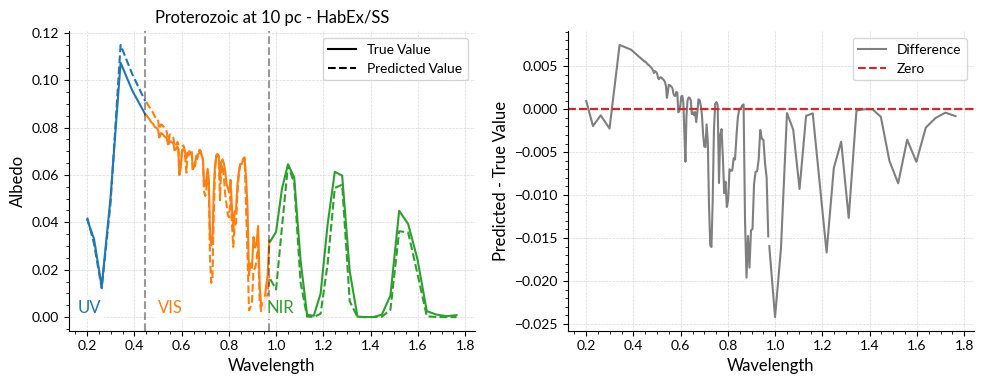

Processing: Archean at 10 pc - HabEx/SS with stage: archean
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


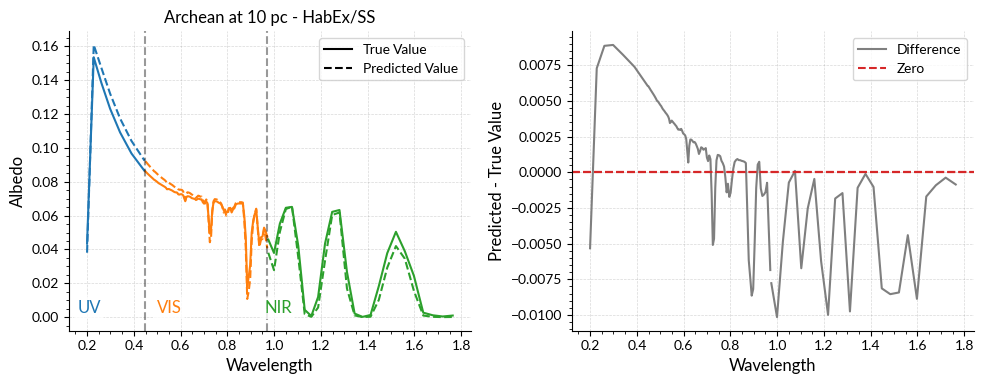

Processing: Modern at 10 pc - HabEx/SS with stage: modern
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


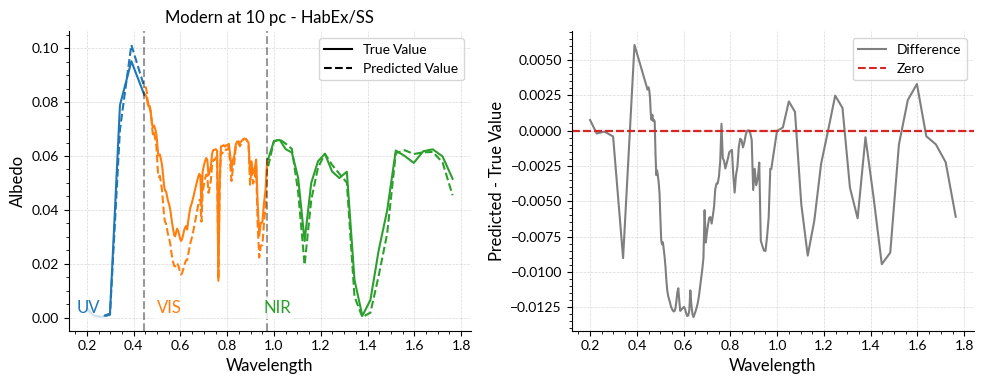

In [13]:
npy_files = glob.glob("../data/tests/*10pc*habex*.npy")
npy_files = [f for f in npy_files if "without" not in os.path.basename(f).lower()]

for file_path in npy_files:
    file_name = os.path.basename(file_path)
    formatted_title = format_title_luvoir(file_name)
    stage = get_stage_from_filename(file_name)
    print("Processing:", formatted_title, "with stage:", stage)
    
    # Load npy file (assumes similar structure as before)
    data = np.load(file_path, allow_pickle=True)
    uv = data[0]["NOISY_ALBEDO"]
    vis = data[1]["NOISY_ALBEDO"]
    nir = data[2]["NOISY_ALBEDO"]
    
    # Normalize each band using loaded stats
    uv_norm = (uv - stats['inputs']['SS-UV']['mean']) / stats['inputs']['SS-UV']['std']
    vis_norm = (vis - stats['inputs']['SS-Vis']['mean']) / stats['inputs']['SS-Vis']['std']
    nir_norm = (nir - stats['inputs']['SS-NIR']['mean']) / stats['inputs']['SS-NIR']['std']
    
    # Reshape to match model input dimensions
    uv_norm = uv_norm.reshape(1, 7, 1)
    vis_norm = vis_norm.reshape(1, 109, 1)
    nir_norm = nir_norm.reshape(1, 25, 1)
    
    # Get predictions from the model using the npy data
    predictions = model_load.predict([uv_norm, vis_norm, nir_norm])
    physical_pred = denormalize_physical(predictions['physical_output'], stats, physical_targets)
    main_chem_pred = denormalize_chemical(predictions['main_chemical_output'], stats, main_chemical_targets)
    other_chem_pred = denormalize_chemical(predictions['other_chemical_output'], stats, other_chemical_targets)
    
    # Extract predicted physical parameters
    predicted_radius      = physical_pred[0, 0] 
    predicted_gravity     = physical_pred[0, 1]
    predicted_temperature = physical_pred[0, 2]
    predicted_pressure    = physical_pred[0, 3]
    
    # Merge chemical predictions into a dictionary.
    predicted_gas_values = {
        "O2": main_chem_pred[0, 0],
        "O3": main_chem_pred[0, 1],
        "CH4": other_chem_pred[0, 0],
        "CO": other_chem_pred[0, 1],
        "CO2": other_chem_pred[0, 2],
        "H2O": other_chem_pred[0, 3],
        "N2": other_chem_pred[0, 4],
        "N2O": other_chem_pred[0, 5]
    }
    
    dg, config = get_config_data(stage)
    uv_real  = generate_original_spectrum(config, "SS-UV", dg)
    vis_real = generate_original_spectrum(config, "SS-Vis", dg)
    nir_real = generate_original_spectrum(config, "SS-NIR", dg)
    
    uv_pred  = generate_modified_spectrum(config, "SS-UV", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    vis_pred = generate_modified_spectrum(config, "SS-Vis", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    nir_pred = generate_modified_spectrum(config, "SS-NIR", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    
    b_uv_end = uv_real["WAVELENGTH"].iloc[-1]
    b_vis_end = vis_real["WAVELENGTH"].iloc[-1]

    _, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Plot all channels on left axis
    axes[0].plot(uv_real["WAVELENGTH"], uv_real["ALBEDO"], color="tab:blue")
    axes[0].plot(uv_pred["WAVELENGTH"], uv_pred["ALBEDO"], linestyle="--", color="tab:blue")

    axes[0].plot(vis_real["WAVELENGTH"], vis_real["ALBEDO"], color="tab:orange")
    axes[0].plot(vis_pred["WAVELENGTH"], vis_pred["ALBEDO"], linestyle="--", color="tab:orange")

    axes[0].plot(nir_real["WAVELENGTH"], nir_real["ALBEDO"], color="tab:green")
    axes[0].plot(nir_pred["WAVELENGTH"], nir_pred["ALBEDO"], linestyle="--", color="tab:green")

    axes[0].axvline(b_uv_end, color='k', linestyle='--', alpha=0.4)
    axes[0].axvline(b_vis_end, color='k', linestyle='--', alpha=0.4)

    axes[0].text(0.05, 0.05, "UV", color='tab:blue', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].text(0.25, 0.05, "VIS", color='tab:orange', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].text(0.52, 0.05, "NIR", color='tab:green', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].set_xlabel("Wavelength")
    axes[0].set_ylabel("Albedo")
    axes[0].set_title(f"{formatted_title}")
    
    # Create custom legend with 2 items: solid for True Value, dashed for Predicted Value.
    true_line = Line2D([], [], color='k', linestyle='-', label='True Value')
    pred_line = Line2D([], [], color='k', linestyle='--', label='Predicted Value')
    axes[0].legend(handles=[true_line, pred_line])

    # Plot difference on right axis for each channel
    channels = [("UV", uv_real, uv_pred),
                ("VIS", vis_real, vis_pred),
                ("NIR", nir_real, nir_pred)]
    for label, df_real, df_pred in channels:
        diff = df_pred["ALBEDO"] - df_real["ALBEDO"]
        axes[1].plot(df_real["WAVELENGTH"], diff, color="tab:gray")
        axes[1].axhline(0, color='tab:red', linestyle='--')
    
    line = Line2D([], [], color='tab:gray', linestyle='-', label='Difference')
    dashed = Line2D([], [], color='tab:red', linestyle='--', label='Zero')

    axes[1].legend(handles=[line, dashed])
    axes[1].set_xlabel("Wavelength")
    axes[1].set_ylabel("Predicted - True Value")
    
    plt.tight_layout()
    plt.show()